In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\Dig\DL_DATA\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

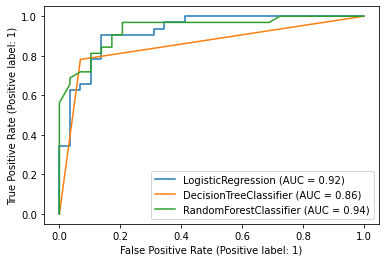

In [7]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(lr, X_test, y_test)
plot_roc_curve(dt, X_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, X_test, y_test, ax = disp.ax_)

In [8]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def visualize_confusion_matrix(model, pred):
    print(f"Accuracy Of The Model: {accuracy_score(y_test,pred)}")
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    disp = plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='.3g')
    disp
    
pred_lr = lr.predict(X_test)
pred_dt = dt.predict(X_test)
pred_rf = rf.predict(X_test)

Accuracy Of The Model: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

[[25  4]
 [ 3 29]]


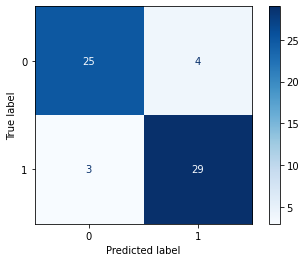

In [9]:
visualize_confusion_matrix(lr, pred_lr)

Accuracy Of The Model: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

[[27  2]
 [ 7 25]]


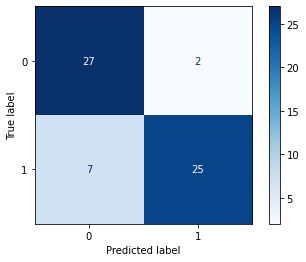

In [10]:
visualize_confusion_matrix(dt, pred_dt)

Accuracy Of The Model: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[24  5]
 [ 4 28]]


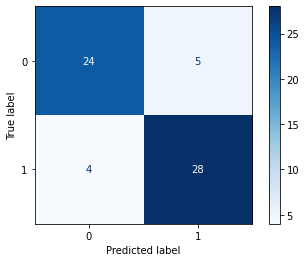

In [11]:
visualize_confusion_matrix(rf, pred_rf)